In [2]:
import pandas as pd
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

### Importar e verificar...

In [3]:
df = pd.read_csv('Data/05-resultado-final.csv', index_col=0)

In [4]:
df['cluster'] = df['cluster'].astype('category')

In [5]:
df.describe()

,count_eventos,recencia,duracao,frequencia
count,8092.000000,8092.000000,8092.000000,8092.000000
mean,67.853435,37.968364,10.092437,2.837741
std,213.573268,23.804294,20.737868,4.974238
min,1.000000,0.000000,0.000000,1.000000
25%,5.000000,19.000000,0.000000,1.000000
50%,14.000000,36.000000,0.000000,1.000000
75%,51.000000,57.000000,7.000000,2.000000
max,8287.000000,84.000000,100.000000,63.000000


In [6]:
df.groupby('cluster').describe()

count_eventos                                                                    recencia                                                     duracao                                                      frequencia                                                    
                count         mean          std     min      25%     50%     75%     max    count       mean        std  min    25%   50%   75%   max   count       mean        std   min   25%   50%   75%    max      count       mean        std   min   25%   50%   75%   max
cluster                                                                                                                                                                                                                                                                          
1              6568.0    22.888094    35.766358     1.0     4.00    10.0    25.0   405.0   6568.0  41.298569  23.146324  0.0  22.00  40.0  61.0  84.0  6568.0   1.790195   4.973860   0.0   0.0   0.0   0.0   41.0     6568.0   1.308922   0.698079   1.0   1.0   1.0   1.0   5.0
2              1230.0   148.586992   141.040895     1.0    49.00   101.5   197.0   714.0   1230.0  25.289431  21.189888  0.0   7.00  20.0  40.0  83.0  1230.0  40.925203  22.099434   0.0  23.0  39.0  57.0   98.0     1230.0   6.247154   3.478969   1.0   4.0   5.0   8.0  18.0
3               210.0   444.671429   284.444278    63.0   215.25   361.0   598.0  1590.0    210.0   9.980952  12.907089  0.0   0.25   5.0  14.0  68.0   210.0  74.423810  16.305880  28.0  65.0  77.0  87.0  100.0      210.0  26.419048  10.166820  14.0  19.0  23.5  31.0  63.0
4                79.0  1229.759494   496.660907   672.0   821.00  1107.0  1516.5  2885.0     79.0  33.645570  22.476220  0.0  14.50  32.0  51.5  78.0    79.0  46.075949  25.474357   0.0  21.5  50.0  68.5   96.0       79.0  13.417722   7.081228   2.0   9.5  12.0  15.0  40.0
5                 5.0  5089.400000  2013.299853  3403.0  3668.00  4296.0  5793.0  8287.0      5.0  26.200000  28.048173  0.0   7.00  15.0  41.0  68.0     5.0  60.600000  33.812720  10.0  43.0  76.0  81.0   93.0        5.0  14.800000  12.477981   3.0  10.0  12.0  13.0  36.0

### Vamos ver quantos usuários temos em cada cluster

In [7]:
df['cluster'].value_counts(normalize=True)

1    0.811666
2    0.152002
3    0.025952
4    0.009763
5    0.000618
Name: cluster, dtype: float64

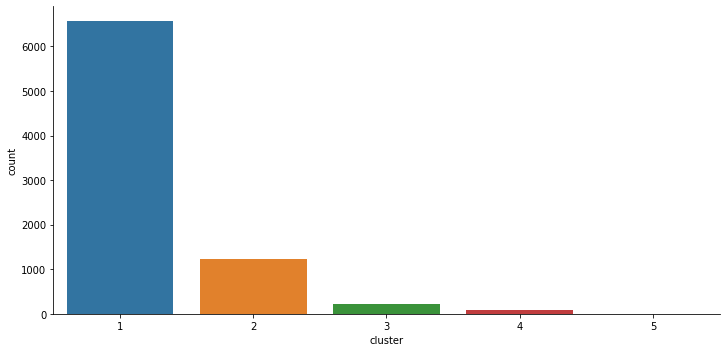

In [28]:
ax = sns.catplot(x="cluster", kind="count", data=df, height=5, aspect=2)
ax.savefig('Imagens/usuários-por-cluster.png')

Ou seja, temos o grupo 1 com 81% de todos os usuários (!) e o grupo 2 com 15%. Os 4% restantes estão divididos nos três últimos clusters.

## Vamos ir a fundo nas características de cada cluster

### Começando por Volume

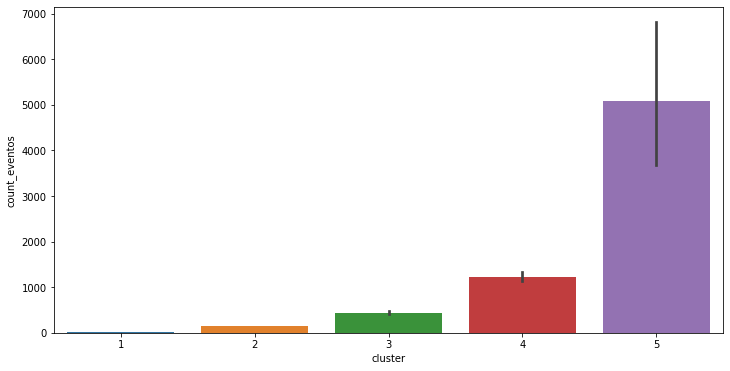

In [46]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x="cluster", y="count_eventos", data=df)
ax.figure.savefig('Imagens/volume-por-cluster.png')

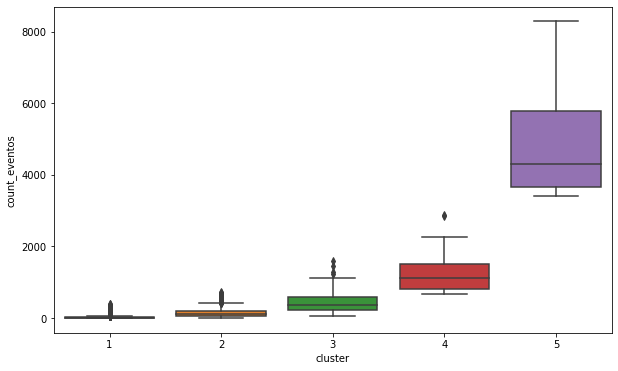

In [57]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x="cluster", y="count_eventos", data=df)

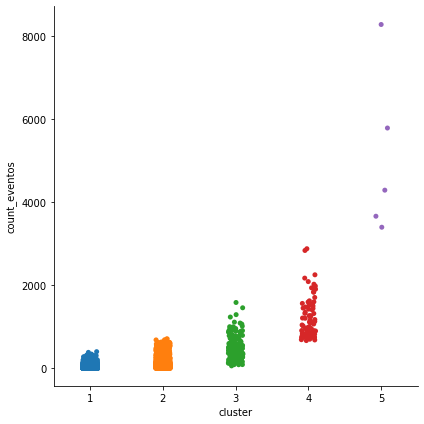

In [58]:
sns.catplot(x="cluster", y="count_eventos", data=df, height=6, aspect=1)

No Volume duas coisas chamam atenção:
1. É uma relação inversa muito clara, os clusters que mais fazem eventos são os que menos tem usuários. Valida nossa hipótese que a maioria dos usuários engaja muito pouco e apenas uma minoria é muito engajada.
2. Com a excessão do último cluster (que só tem 5 usuários), há pouca variância de Volume de eventos em cada cluster. Ou seja, os usuários de um mesmo cluster fazem eventos de forma muito similar.

### Agora Recência

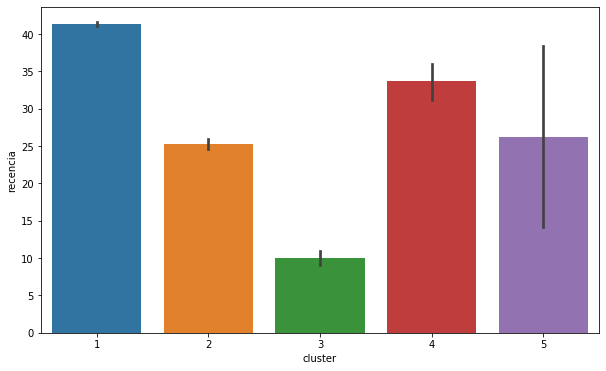

In [59]:
plt.figure(figsize=(10,6))
sns.barplot(x="cluster", y="recencia", data=df,ci=68)

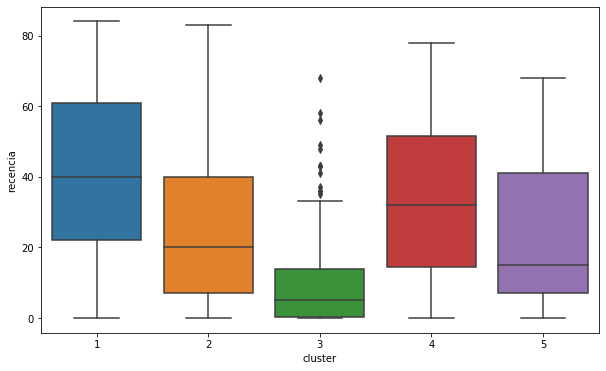

In [60]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x="cluster", y="recencia", data=df)

Também duas coisas interessantes:
1. Do cluster 1 ao 3, há uma "escadinha" perfeita, que indica que esses usuários do terceiro cluster majoritariamente ainda estavam ativos até a última data de coleta de dados da pesquisa.
2. Tirando o terceiro, há muita variancia dentro dos outros clusters. Em quase todos eles dá há usuários que foram vistos pela última vez "ontem" e outros que só três meses atrás. Essa talvez seja a propriedade que menos nos ajude, provavelmente por que novos usuários se registram todos os dias.

## Frequência

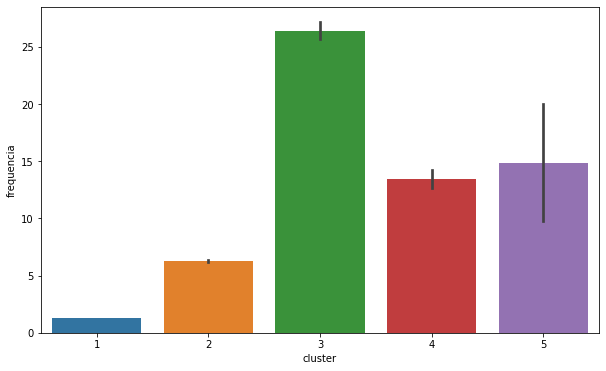

In [61]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x="cluster", y="frequencia", data=df ,ci=68)

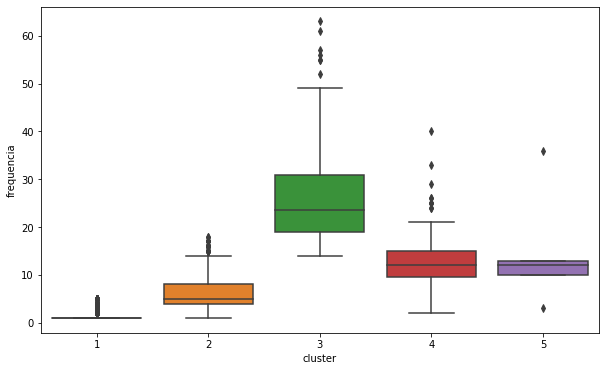

In [62]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x="cluster", y="frequencia", data=df)

Aqui algumas coisas chamam atenção:
1. Mesmo com mais variância que os outros, o Grupo 3 claramente se destaca como o que mais frequentemente acessa a plataforma.
2. O primeiro grupo praticamente **não tem frequência**, entram em apenas um dia e não voltam mais.
3. O Grupo 4 e 5, mesmo tendo feito muito vezes mais eventos que quaisquer outros, entraram só um pouco mais que o Grupo 2 e até menos que o Grupo 3. Ou seja, entraram poucas vezes, mas cada vez que entraram fizeram muitas coisas de uma só vez.

### Por último, a Duração

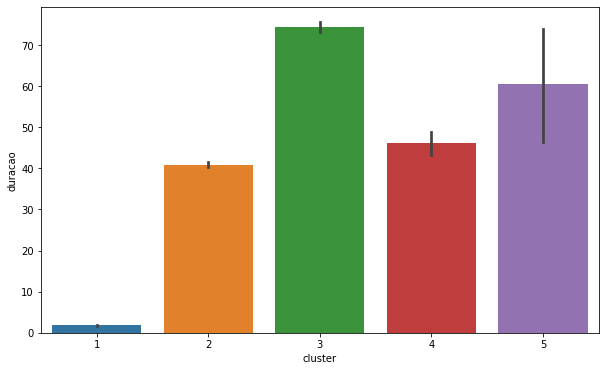

In [63]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x="cluster", y="duracao", data=df ,ci=68)

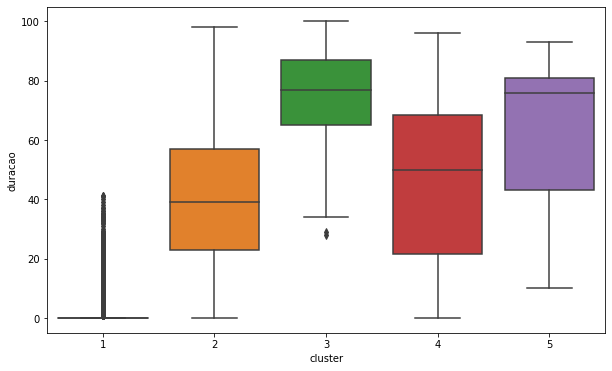

In [64]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x="cluster", y="duracao", data=df)

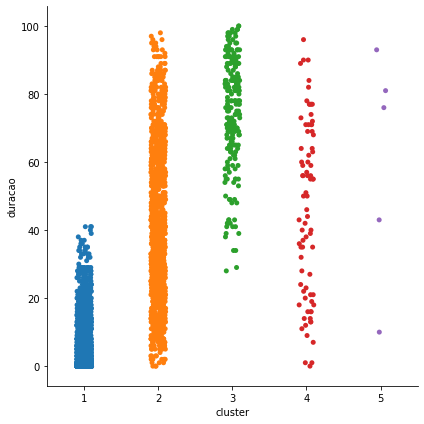

In [65]:
sns.catplot(x="cluster", y="duracao", data=df, height=6, aspect=1)

Vamos lá:
1. Assim como a Recência, há bastante variabilidade aqui, especialmente nos Grupos 2, 4 e 5. Já o Grupo 1 e 2 tem um padrão um pouco mais claro.
2. O Grupo 1 majoritariamente não tem duração, já usam um único dia. Mas há nele alguns usuários outliers que chegam a voltar até 40 dias depois, mas nunca depois disso.
3. O Grupo 3 novamente acha atenção, são os mais consistentemente ativos. Na mediana estiveram ativos durante 77 dias, quase a série histórica inteira! 

### Agora, vamos analisar novamente as correlações entre as features

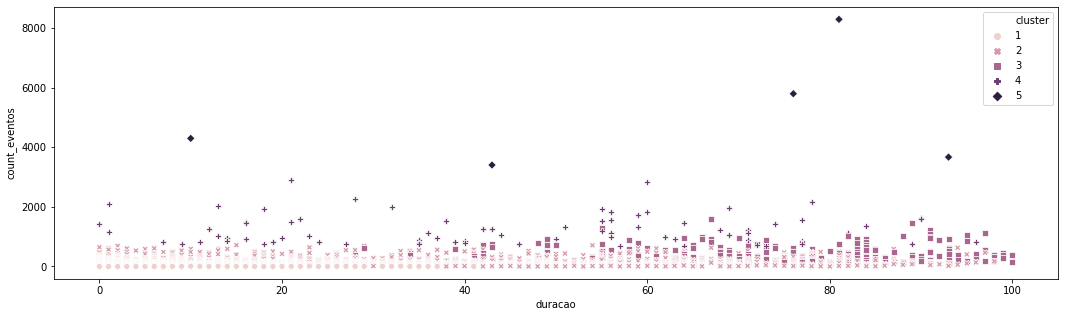

In [19]:
plt.figure(figsize=(18,5))
sns.scatterplot(data=df, x="duracao", y="count_eventos", hue="cluster", style="cluster", legend="full")

Aqui fica bem claro como o Grupo 5 é feito por outliers, a duração não é muito diferente dos outros grupos, mas fazem incrivelmente mais eventos que todos os outros. O Grupo 4 é até parecido, só são mais numeros e não fazem tão mais eventos assim.

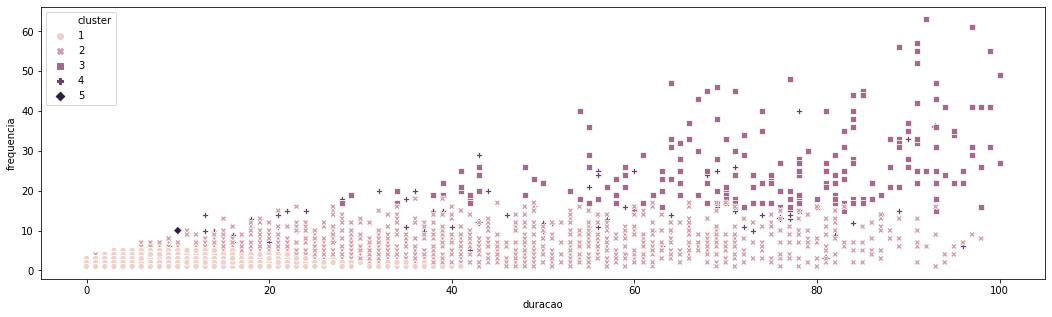

In [20]:
plt.figure(figsize=(18,5))
sns.scatterplot(data=df, x="duracao", y="frequencia", hue="cluster", style="cluster", legend="full")

E aqui fica claro a diferença do Grupo 3: são muito mais frequentes que qualquer outro.

### Agora vamos dar uma olhada na porcentagem de uso de Mobile por Cluster

In [21]:
df['mobile'] = df.os.replace(['Windows', 'Chrome OS', 'Linux', 'Mac OS X', 'Android', 'iOS'], [0, 0, 0, 0, 1, 1])

In [22]:
df['mobile'].astype('int32')

0       0
1       0
2       0
3       0
4       0
       ..
8195    0
8196    0
8197    1
8198    1
8199    0
Name: mobile, Length: 8092, dtype: int32

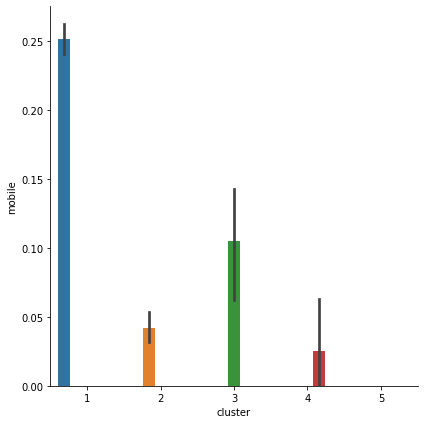

In [66]:
sns.catplot(x="cluster", y="mobile", kind="bar", hue="cluster", data=df, height=6, aspect=1)

O Grupo 1 disparado tem mais usuários em dispositívos móveis: cerca de 25%. Grupo 2 e 4 são parecidos, com menos de 5%. O surpreendente é o Grupo 3 com 10%, mais que o dobro dos seus pares próximos, e mesmo assim é o mais engajado.